In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import matplotlib.pyplot as plt



# Reading the dataset

In [3]:
cars_data=pd.read_excel('Cardekho Dataset.xlsx')
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [4]:
cars_data.rename(columns={'mileage(km/ltr/kg)': 'mileage'}, inplace=True)
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


## Data Pre-processing

In [5]:
cars_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

Deleting the null values

In [6]:
cars_data.dropna(inplace=True)
cars_data.shape

(7907, 12)

Duplicate Check

In [7]:
cars_data.duplicated().sum()
cars_data.drop_duplicates(inplace=True)

In [8]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 682.3+ KB


In [9]:
for col in cars_data:
  print("Unique vale in"+' '+ col)
  print(cars_data[col].unique)
  print("==========================")
  print("==========================")

Unique vale in name
<bound method Series.unique of 0                  Maruti Swift Dzire VDI
1            Skoda Rapid 1.5 TDI Ambition
2                Honda City 2017-2020 EXi
3               Hyundai i20 Sportz Diesel
4                  Maruti Swift VXI BSIII
                      ...                
8121    Maruti Wagon R VXI BS IV with ABS
8122           Hyundai i20 Magna 1.4 CRDi
8123                    Hyundai i20 Magna
8124                Hyundai Verna CRDi SX
8125               Maruti Swift Dzire ZDi
Name: name, Length: 6718, dtype: object>
Unique vale in year
<bound method Series.unique of 0       2014
1       2014
2       2006
3       2010
4       2007
        ... 
8121    2013
8122    2014
8123    2013
8124    2007
8125    2009
Name: year, Length: 6718, dtype: int64>
Unique vale in selling_price
<bound method Series.unique of 0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8121    260000
8122    475000
8123    320000
8124    135000
81

In [10]:
cars_data['fuel'].value_counts()


fuel
Diesel    3658
Petrol    2973
CNG         52
LPG         35
Name: count, dtype: int64

In [11]:
def get_brand_name(car_name):
  car_name= car_name.split(' ')[0]
  return car_name.strip(' ')
  

In [12]:
get_brand_name('Skoda Rapid 1.5 TDI Ambition')



'Skoda'

In [13]:
cars_data['name']=cars_data['name'].apply(get_brand_name)

In [14]:
cars_data['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

Incoding Char type data

In [15]:
cars_data['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],
                          inplace=True)

/var/folders/n7/1jly94yx0w15_lwfww9f_1zh0000gn/T/ipykernel_2663/2304126385.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
/var/folders/n7/1jly94yx0w15_lwfww9f_1zh0000gn/T/ipykernel_2663/2304126385.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set

In [16]:
cars_data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [17]:
cars_data['transmission'].replace(['Manual', 'Automatic'],[1,2], inplace=True)

/var/folders/n7/1jly94yx0w15_lwfww9f_1zh0000gn/T/ipykernel_2663/2474138088.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['transmission'].replace(['Manual', 'Automatic'],[1,2], inplace=True)
/var/folders/n7/1jly94yx0w15_lwfww9f_1zh0000gn/T/ipykernel_2663/2474138088.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.

In [18]:
cars_data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [19]:
cars_data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3], inplace=True)

/var/folders/n7/1jly94yx0w15_lwfww9f_1zh0000gn/T/ipykernel_2663/355062479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3], inplace=True)
/var/folders/n7/1jly94yx0w15_lwfww9f_1zh0000gn/T/ipykernel_2663/355062479.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd

In [20]:
cars_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4], inplace=True)

/var/folders/n7/1jly94yx0w15_lwfww9f_1zh0000gn/T/ipykernel_2663/3825771590.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4], inplace=True)
/var/folders/n7/1jly94yx0w15_lwfww9f_1zh0000gn/T/ipykernel_2663/3825771590.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('

In [35]:
cars_data.info()
cars_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   int64  
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   int64  
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6717 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 682.3 KB


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0


In [23]:
cars_data['owner'].value_counts()

owner
First Owner             4176
Second Owner            1889
Third Owner              493
Fourth & Above Owner     155
Test Drive Car             5
Name: count, dtype: int64

In [24]:
cars_data['owner'].replace(
    ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car'],
    [1, 2, 3, 4, 5],
    inplace=True
)

/var/folders/n7/1jly94yx0w15_lwfww9f_1zh0000gn/T/ipykernel_2663/362038152.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars_data['owner'].replace(


In [26]:
# Ensure 'mileage' is of type float
cars_data['mileage'] = cars_data['mileage'].astype(float)

In [34]:
cars_data['max_power'] = pd.to_numeric(cars_data['max_power'], errors='coerce')

In [36]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0


In [38]:
input_data=cars_data.drop(columns=['selling_price'])
output_data=cars_data['selling_price']

# Test and Train data split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

Creating Model

In [40]:
import xgboost as xgb
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,           # Increase number of trees
    learning_rate=0.05,         # Lower learning rate for better accuracy
    max_depth=6,                # Deeper trees
    subsample=0.8,              # Randomly select a subsample of data for training
    colsample_bytree=0.8,       # Randomly select a subsample of columns for training
    min_child_weight=1,         # Minimum sum of instance weight needed in a child
    gamma=0,                    # Minimum loss reduction required for a split
    reg_alpha=0.1,              # L1 regularization (to prevent overfitting)
    reg_lambda=0.1,             # L2 regularization (to prevent overfitting)
    random_state=42
)

In [41]:
model.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [42]:
predict = model.predict(x_test)

In [43]:
predict

array([414062.16 , 794886.1  , 575326.5  , ..., 902860.   , 113998.734,
       269573.72 ], dtype=float32)

MODEL EVALUATION

In [47]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared score

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 17822399235.5809
Root Mean Squared Error: 133500.55893358987
Mean Absolute Error: 69880.09541829427
R-squared: 0.8988626599311829


In [44]:
x_train.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
2804,3,2008,110000,2,1,1,2,17.70,1497.0,78.0,5.0
1428,6,2017,35000,1,1,1,1,25.83,1498.0,99.0,5.0
7101,4,2010,80000,3,1,1,1,13.20,1495.0,93.7,5.0
6876,8,2008,110000,1,1,1,1,12.70,2609.0,116.6,8.0
7360,1,2017,58559,1,2,1,1,25.20,1248.0,74.0,5.0


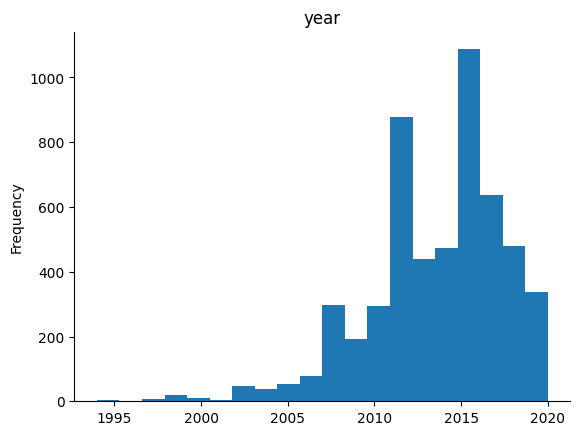

In [45]:
from matplotlib import pyplot as plt
x_train['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)